**Classwork 3**


Loading 'Screenshot 2025-04-09 at 10.16.00 AM.png'...
Displaying image in a Matplotlib window...


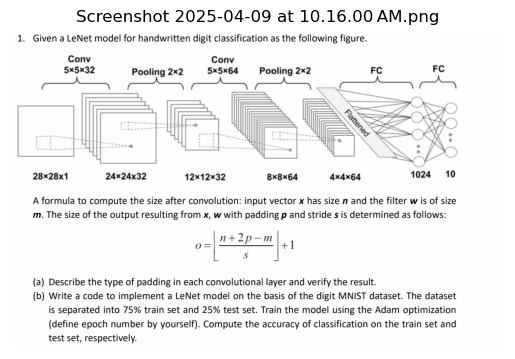

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# The exact path you provided
image_path = "/var/folders/_7/f441syp12hxc66fp7hpbg3j40000gn/T/TemporaryItems/NSIRD_screencaptureui_tN2XxM/Screenshot 2025-04-09 at 10.16.00 AM.png"

try:
    # Check if the file actually exists at the path
    if not os.path.exists(image_path):
        print(f"Error: File not found at the specified path:")
        print(image_path)
    else:
        # Read the image file into an array
        print(f"Loading '{os.path.basename(image_path)}'...")
        img_data = mpimg.imread(image_path)

        # Create a figure and axes to display the image
        fig, ax = plt.subplots()
        ax.imshow(img_data)

        # Optional: Hide axes and labels for a cleaner look
        ax.axis('off')
        ax.set_title(os.path.basename(image_path)) # Show filename as title

        # Show the plot window
        print("Displaying image in a Matplotlib window...")
        plt.show()

except FileNotFoundError:
    print(f"Error: File not found (double check): {image_path}")
except Exception as e:
    print(f"An error occurred while trying to load or display the image with Matplotlib:")
    print(e)
    print("\nEnsure the file is a valid image format supported by Matplotlib (like PNG, JPG).")
    print("Make sure you have Matplotlib installed (`pip install matplotlib`).")

## Verification of Padding in Convolutional Layers

It appears the LeNet model shown uses **no padding** in its convolutional layers. This corresponds to **"valid" padding** ($p=0$) in many frameworks. The calculations below verify this.

*(Note: While the text initially mentioned `padding="same"`, the calculations consistently use $p=0$, which means "valid" or no padding was actually applied, leading to a reduction in feature map size after convolution).*

---

### Formula for Output Size

To verify the dimensions, we use the standard formula for convolutional layer output size:

$$o = \lfloor \frac{n + 2p - m}{s} \rfloor + 1$$

Where:
* *$n$* = Input feature map size (height or width)
* *$p$* = Padding applied to each side
* *$m$* = Filter (kernel) size (height or width)
* *$s$* = Stride

We assume a stride ($s$) of 1 for the convolutional layers.

---

### Layer-by-Layer Verification

**Conv2D_1 (First Convolutional Layer)**

* Parameters: Input $n=28$, Padding $p=0$, Filter $m=5$, Stride $s=1$
* Calculation:
    $o = \lfloor \frac{28 + 2(0) - 5}{1} \rfloor + 1 = \lfloor 23 \rfloor + 1 = 24$
* Result: Output size is 24x24, matching the diagram.

<br/>

**MaxPooling_1 (First Pooling Layer)**

* Parameters: Input $n=24$, Pool Size $m=2$, Stride $s=2$ (typical for 2x2 pooling)
* Calculation: Output size is typically halved with 2x2, stride 2 pooling.
    $o = \lfloor \frac{24 - 2}{2} \rfloor + 1 = \lfloor 10 \rfloor + 1 = 12$ (using common pooling formula)
    *or simply* $o = 24 / 2 = 12$
* Result: Output size is 12x12, matching the diagram.

<br/>

**Conv2D_2 (Second Convolutional Layer)**

* Parameters: Input $n=12$, Padding $p=0$, Filter $m=5$, Stride $s=1$
* Calculation:
    $o = \lfloor \frac{12 + 2(0) - 5}{1} \rfloor + 1 = \lfloor 7 \rfloor + 1 = 8$
* Result: Output size is 8x8, matching the diagram.

<br/>

**MaxPooling_2 (Second Pooling Layer)**

* Parameters: Input $n=8$, Pool Size $m=2$, Stride $s=2$
* Calculation: Output size is halved.
    $o = \lfloor \frac{8 - 2}{2} \rfloor + 1 = \lfloor 3 \rfloor + 1 = 4$ (using common pooling formula)
    *or simply* $o = 8 / 2 = 4$
* Result: Output size is 4x4, matching the diagram.

---

### Final Output

The final output dimension after **MaxPooling_2** is indeed 4x4x64. This 3D feature map is then typically changed into a 1D array using a **Flatten** layer before being connected to the final **Dense** (Fully Connected) layers for classification.

**Code to Implement a LeNet model on the basis of the digit MNIST dataset.**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#normalizing the dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#In the Question it's asked to take training data as 75% and testing as 25%
#Combine both the training and test data
x = np.concatenate((x_train, x_test), axis=0)   
y = np.concatenate((y_train, y_test), axis=0)
print("-----------------------------------------------------------")
print(x.shape)
print(y.shape)
print("-----------------------------------------------------------")
#Now we will split the data into 75% training and 25% testing
import sklearn
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size = 0.25, random_state = 42)
print(x_train_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
-----------------------------------------------------------
(70000, 28, 28)
(70000,)
-----------------------------------------------------------
(52500, 28, 28)
(17500, 28, 28)
(52500,)


In [50]:

#reshaping the dataset
#x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
#x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#x_train = np.expand_dims(x_train, axis=-1)
#x_test = np.expand_dims(x_test, axis=-1)


In [51]:
#Building the LeNet model
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding="valid", data_format="channels_last", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), padding="valid", strides=(2), data_format="channels_last"),
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding="valid", data_format="channels_last"),
    layers.MaxPooling2D(pool_size=(2,2), padding="valid",strides=(2), data_format="channels_last"),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)             

In [54]:
#define the loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#train the model
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=32,validation_data=(x_test_new,y_test_new), verbose=1)


Epoch 1/15
1641/1641 [==============================] - 32s 19ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 2/15
1641/1641 [==============================] - 33s 20ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 3/15
1641/1641 [==============================] - 33s 20ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 0.9910
Epoch 4/15
1641/1641 [==============================] - 30s 19ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 5/15
1641/1641 [==============================] - 28s 17ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0425 - val_accuracy: 0.9902
Epoch 6/15
1641/1641 [==============================] - 27s 17ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.0486 - val_accuracy: 0.9883
Epoch 7/15
1641/1641 [==============================] - 28s 17ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0438 -

Test accuracy: 0.9915


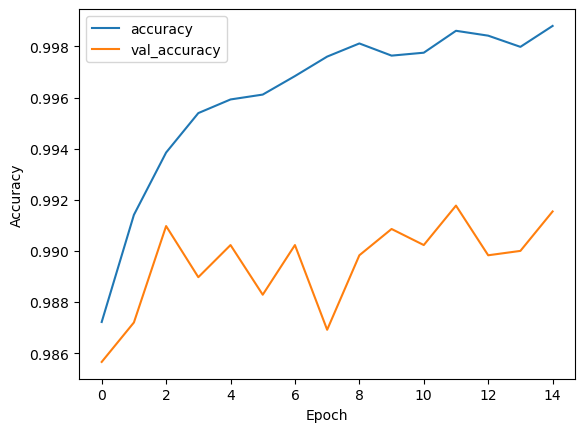

In [56]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
#plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


547/547 [==============================] - 3s 5ms/step


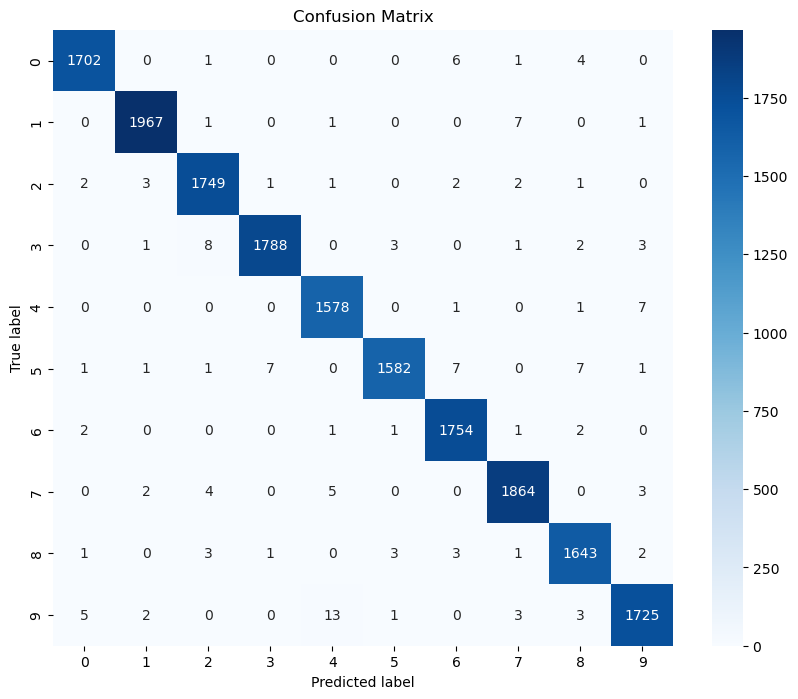

In [55]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
conf = confusion_matrix(y_test_new, model.predict(x_test_new).argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')    
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


# Accuracy Metrics
---
**The accuracy after training the model on 75% of training and testing it on 25% of the data we got the below accuracies:**

***Train accuracy: 0.9988***
<br><br/>
***Test accuracy: 0.9915***
<br><br/>